In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [4]:
data = pd.read_csv("general_data.csv")

In [5]:
data1 = data[['Age','Attrition','DistanceFromHome','MonthlyIncome','TrainingTimesLastYear','JobLevel','TotalWorkingYears','Education']]

In [6]:
data1.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,JobLevel,TotalWorkingYears,Education
0,51,No,6,131160,6,1,1.0,2
1,31,Yes,10,41890,3,1,6.0,1
2,32,No,17,193280,2,4,5.0,4
3,38,No,2,83210,5,3,13.0,5
4,32,No,10,23420,2,1,9.0,1


In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
encoded_attrition = label_encoder.fit_transform(data1["Attrition"])

In [9]:
data1["Attrition"] = encoded_attrition

C:\Users\supri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
tree_model = tree.DecisionTreeClassifier()

__Random Forest__

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
data1["TotalWorkingYears"] = np.where(data1["TotalWorkingYears"].isnull(),data1["TotalWorkingYears"].mean(),data1["TotalWorkingYears"])

C:\Users\supri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data1.isnull().sum()

Age                      0
Attrition                0
DistanceFromHome         0
MonthlyIncome            0
TrainingTimesLastYear    0
JobLevel                 0
TotalWorkingYears        0
Education                0
dtype: int64

In [14]:
rf_model = RandomForestClassifier(n_estimators = 1000,max_features = 2,oob_score=True)

In [15]:
features = ["Age","DistanceFromHome",'MonthlyIncome','TrainingTimesLastYear','JobLevel','TotalWorkingYears','Education']

In [16]:
rf_model.fit(X = data1[features],y = data1["Attrition"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
print(rf_model.oob_score_)

0.999546485260771


In [18]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.18305563142542755
DistanceFromHome 0.1549982977449453
MonthlyIncome 0.2531588532868296
TrainingTimesLastYear 0.08097698378937403
JobLevel 0.07219379106642396
TotalWorkingYears 0.18272473941555412
Education 0.07289170327144556


Now we are going to consider top 3 in these values:

1) Monthly Income

2) Total Working Years

3) Age

In [19]:
predictors = pd.DataFrame([data1["MonthlyIncome"],data1["TotalWorkingYears"],data1["Age"]]).T

In [20]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

In [21]:
tree_model.fit(X=predictors, y = data1["Attrition"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
with open("dtree-attrition.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["MonthlyIncome","TotalWorkingYears","Age"],out_file = f)

__Decision Tree__

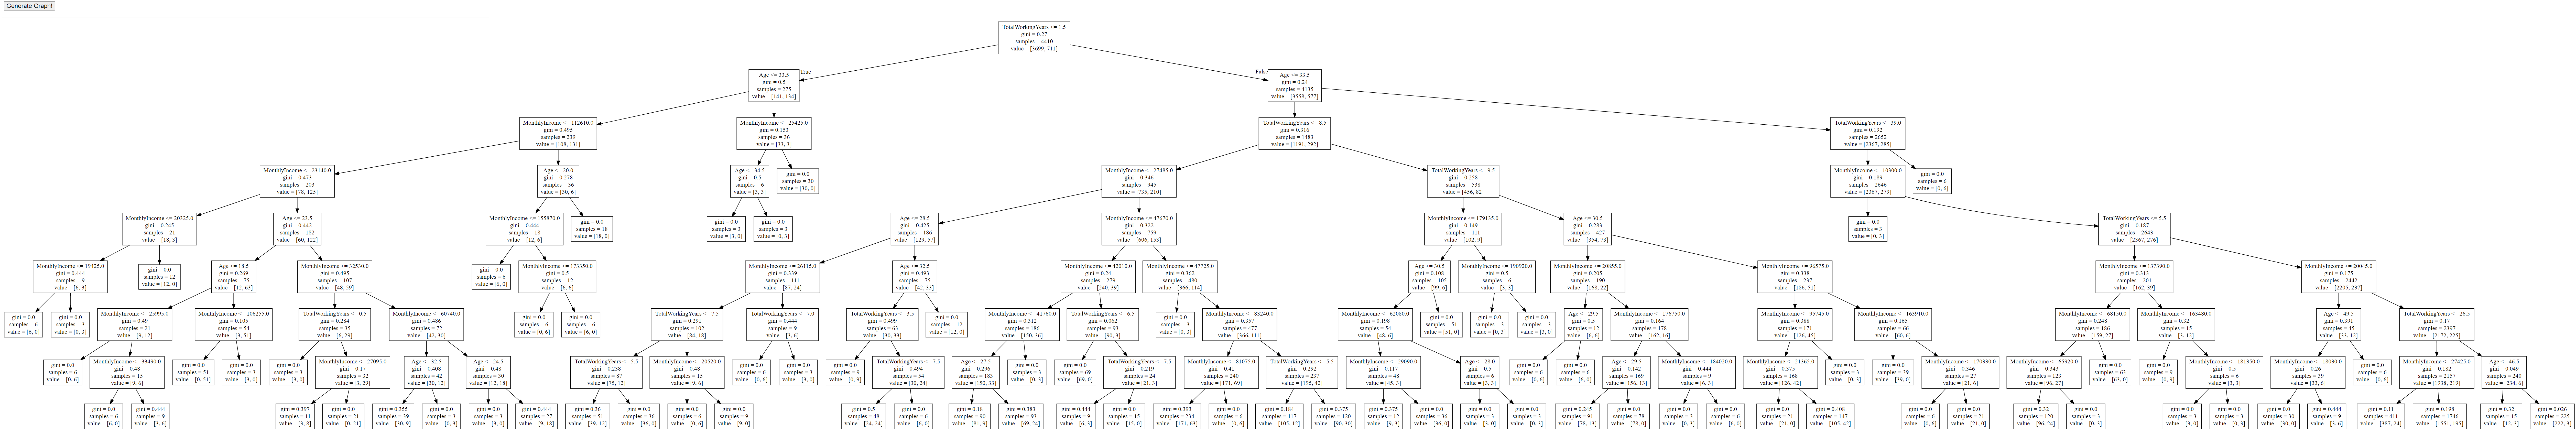

In [23]:
tree_model.score(X = predictors,y = data1["Attrition"])

0.8841269841269841

__So we can conclude that the model is 88% accurate__